In [1]:
# process 7 PAH LPR (120 hrs larval photomotor response)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"
sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/each/7_PAH/LPR


In [3]:
#LPR data file
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_LPR_data_2021JAN11_wide_t0_t239_devel.csv'
lpr_all_data = pd.read_csv(complete_file_path, header = 0)

In [4]:
display(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))
# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
display(lpr_all_data)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,...,0.434,0.000,1.076,0.000000,0.00,0.000,0.000,0.000,0.000,0.000
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,...,0.000,0.000,0.000,0.000000,0.00,0.000,0.000,0.000,0.000,0.000
2,3756,20544,A05,3756_20544_A05,100.0,6.632,2.626,5.640,3.342,0.741,...,1.845,0.000,0.000,0.000000,1.85,0.000,0.856,0.000,0.000,0.000
3,3756,20544,A06,3756_20544_A06,100.0,7.262,1.071,2.472,1.030,0.300,...,12.307,14.189,6.722,24.010001,0.00,5.421,10.087,4.785,7.256,5.891
4,3756,20544,A08,3756_20544_A08,100.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000000,0.00,0.000,0.000,0.000,0.000,0.000


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,...,0.434,0.000,1.076,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,...,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
2,3756,20544,A05,3756_20544_A05,100.0,6.632,2.626,5.640,3.342,0.741,...,1.845,0.000,0.000,0.000000,1.850,0.000,0.856,0.000,0.000,0.000
3,3756,20544,A06,3756_20544_A06,100.0,7.262,1.071,2.472,1.030,0.300,...,12.307,14.189,6.722,24.010001,0.000,5.421,10.087,4.785,7.256,5.891
4,3756,20544,A08,3756_20544_A08,100.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3756,20625,H08,3756_20625_H08,0.0,0.000,1.489,2.236,0.000,0.000,...,0.000,0.000,0.000,2.551000,0.477,1.893,1.218,4.060,0.977,2.032
219,3756,20625,H09,3756_20625_H09,0.0,0.000,0.000,6.225,0.000,1.418,...,5.886,5.290,2.126,6.110000,2.250,3.036,0.931,0.589,1.158,3.776
220,3756,20625,H10,3756_20625_H10,0.0,8.172,0.616,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
221,3756,20625,H11,3756_20625_H11,0.0,0.101,0.884,0.000,0.000,0.000,...,20.029,13.789,12.254,8.076000,18.930,15.247,11.636,15.055,1.907,0.000


In [5]:
np.unique(lpr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [6]:
unique_chemical_IDs = np.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 3756
Plate IDs: [20544 20624 20625]
Number of unique plates: 3
Concentrations tested: [  0.     2.16   6.8   14.7   31.6   56.2   75.   100.  ]
Number of concentrations: 8
Total number of wells: 223
Number of wells for compound ID 3756 and concentration 0.0 are 30
Number of wells for compound ID 3756 and concentration 2.16 are 33
Number of wells for compound ID 3756 and concentration 6.8 are 30
Number of wells for compound ID 3756 and concentration 14.7 are 28
Number of wells for compound ID 3756 and concentration 31.6 are 27
Number of wells for compound ID 3756 and concentration 56.2 are 23
Number of wells for compound ID 3756 and concentration 75.0 are 23
Number of wells for compound ID 3756 and concentration 100.0 are 29


## Load morphological data for filtering wells that have dead fish

In [7]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_morphology_data_2021JAN11_wide_made_in_2021_01_19_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

In [9]:
print("morphology_all_data.shape:" + str(morphology_all_data.shape))
print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))

print("\nlpr_all_data.shape:" + str(lpr_all_data.shape))
print("lpr_filtered_data.shape:"+str(lpr_filtered_data.shape) + "\n")

display(morphology_nonna_data_plate_well[0:5])
print ("\n")
display(lpr_all_data.Chemical_Plate_WELL[0:5])

morphology_all_data.shape:(2003, 20)
morphology_nonna_data_plate_well.shape:(1717,)

lpr_all_data.shape:(223, 246)
lpr_filtered_data.shape:(223, 246)



1    3756_20544_A02
3    3756_20544_A04
4    3756_20544_A05
5    3756_20544_A06
7    3756_20544_A08
Name: Chemical_Plate_WELL, dtype: object

0    3756_20544_A02
1    3756_20544_A04
2    3756_20544_A05
3    3756_20544_A06
4    3756_20544_A08
Name: Chemical_Plate_WELL, dtype: object

In [10]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(lpr_all_data['Chemical_Plate_WELL'])))

In [11]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(lpr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [12]:
lpr_filtered_data.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,...,0.000,1.076,0.000000,0.00,0.000,0.000,0.000,0.000,0.000,3756_20544_A02
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,...,0.000,0.000,0.000000,0.00,0.000,0.000,0.000,0.000,0.000,3756_20544_A04
2,3756,20544,A05,3756_20544_A05,100.0,6.632,2.626,5.640,3.342,0.741,...,0.000,0.000,0.000000,1.85,0.000,0.856,0.000,0.000,0.000,3756_20544_A05
3,3756,20544,A06,3756_20544_A06,100.0,7.262,1.071,2.472,1.030,0.300,...,14.189,6.722,24.010001,0.00,5.421,10.087,4.785,7.256,5.891,3756_20544_A06
4,3756,20544,A08,3756_20544_A08,100.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000000,0.00,0.000,0.000,0.000,0.000,0.000,3756_20544_A08


In [77]:
# Convert time resolution to minutes (if applicable)
# for LPR, 240 -> 24

# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_in_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
time_index_sec_start = 5
max_time_index_sec = 240 # from 0 to 239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    lpr_filtered_data_in_minutes_in_this_time_index = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    if (report):
        print ("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
        display(lpr_filtered_data_in_minutes_in_this_time_index.head())
        display(lpr_filtered_data_in_minutes_in_this_time_index.tail())
    
    lpr_filtered_data_in_minutes_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_in_minute = pd.concat([lpr_filtered_data_in_minute, lpr_filtered_data_in_minutes_in_this_time_index], axis = 1)
#pd.set_option('display.max_columns', None)
lpr_filtered_data_in_minute.head()

interval:1 min


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
0,3756,100.0,20544,A02,6.938,0.000,0.000,5.768,2.803,1.340,0.737,0.000,0.687,4.076,18.828,3.899,0.000,18.939,0.000,32.481000,25.986,20.889,10.623,0.000,0.000,55.755001,10.996000,1.510000
1,3756,100.0,20544,A04,8.713,4.569,0.000,0.000,1.171,3.520,10.024,5.496,5.856,1.440,0.771,4.478,3.324,9.531,0.000,0.000000,0.000,0.000,2.479,0.000,1.443,0.000000,0.000000,0.000000
2,3756,100.0,20544,A05,23.312,0.998,0.000,0.000,2.767,16.229,8.390,12.915,20.722,0.563,25.654,12.374,7.760,6.226,9.138,31.217000,7.088,18.909,19.015,12.715,2.152,0.000000,2.979000,4.551000
3,3756,100.0,20544,A06,27.227,37.086,23.849,35.032,93.506,78.930,22.692,0.000,0.000,42.169,53.546,36.737,14.306,4.155,0.000,36.813001,84.746,71.349,22.439,0.000,1.941,90.541000,102.553001,90.668001
4,3756,100.0,20544,A08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000


        t0      t1      t2      t3      t4      t5      t6      t7      t8  \
10  17.628  14.318  13.529  29.401  34.006  28.817   9.512  15.059  11.063   
11   9.398   0.000   3.593   1.172   1.182   3.605  12.026   1.140   0.000   
12   4.006   3.488   1.821   1.892  29.020  16.491   6.954   3.050   8.307   
13   4.762   0.000   0.600   2.795   1.145   1.645   0.846   4.938   0.813   
14   1.421   0.000   2.055   0.000   0.000   0.000   7.012   1.103   0.000   

        t9     t10        t11     t12     t13    t14     t15     t16     t17  \
10  50.833  26.484  45.198999  14.225  26.728  7.564  56.274  51.426  40.464   
11   8.242  14.369   0.000000   4.888   0.858  0.000   0.000   2.826   1.126   
12   7.505  30.234  26.247000   5.937   5.349  0.991  27.282  32.891  37.737   
13   9.608   7.537   6.369000   0.446   0.486  5.135   0.000   0.993   0.691   
14   1.467   0.000   1.571000   0.778   0.000  1.062   0.000   2.641   4.646   

       t18    t19     t20        t21     t22     t

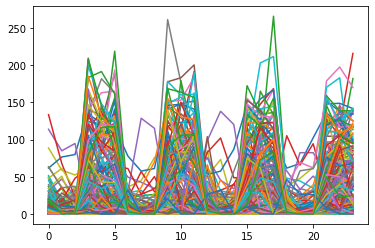

In [78]:
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values
num_time_points = 24 # >= 25 will not make any difference

#print ("lpr_filtered_data_in_minute.shape:" + str(lpr_filtered_data_in_minute.shape)) #(223, 28)

fig, ax = plt.subplots()

print (lpr_filtered_data_in_minute.iloc[10:15, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(lpr_filtered_data_in_minute.iloc[10:223,time_index_start:time_index_start + num_time_points].values));

In [81]:
delta_mov_auc = lpr_filtered_data_in_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()

#transition_points = [4,10,16,22]
# middle points of each peak -> 4,10,16,22

transition_points = [4,10,16] # using 22 caused an error

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

delta_mov_auc['MOV_1_2_3'] = 0 # just initial value
delta_mov_auc['AUC_1_2_3'] = 0 # just initial value

for transition_index, transition_point in enumerate(transition_points):
    print ("\n")
    print ("transition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    delta_mov_auc['MOV' + str(transition_index + 1)] \
    = lpr_filtered_data_in_minute['t' + str(transition_point + 1)] \
    - lpr_filtered_data_in_minute['t' + str(transition_point)]

    delta_mov_auc['AUC' + str(transition_index + 1)] \
    = sum(lpr_filtered_data_in_minute['t' + str(transition_point + 1 + index_count)] \
          for index_count in range(num_dark)) \
    - sum(lpr_filtered_data_in_minute['t' + str(transition_point - index_count)] \
          for index_count in range(num_light))
    
    # I didn't fully understand this part, but it works as intended
    delta_mov_auc['MOV_1_2_3'] = delta_mov_auc['MOV_1_2_3'] + delta_mov_auc['MOV' + str(transition_index + 1)]
    delta_mov_auc['AUC_1_2_3'] = delta_mov_auc['AUC_1_2_3'] + delta_mov_auc['AUC' + str(transition_index + 1)]
    
display(delta_mov_auc.head())



transition_index:0
transition_point:4


transition_index:1
transition_point:10


transition_index:2
transition_point:16


,chemical.id,conc,plate.id,well,MOV_1_2_3,AUC_1_2_3,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3
0,3756,100.0,20544,A02,-21.489,-34.202001,-1.463,-6.494,-14.929,-0.753001,-5.097,-26.955000
1,3756,100.0,20544,A04,6.056,29.614000,2.349,17.869,3.707,9.266000,0.000,2.479000
2,3756,100.0,20544,A05,12.003,17.384001,13.462,34.767,-13.280,-20.579000,11.821,3.196001
3,3756,100.0,20544,A06,-44.782,-119.053000,-14.576,-50.765,-16.809,-40.517000,-13.397,-27.771000
4,3756,100.0,20544,A08,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000


In [82]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())

,Chemical.ID,CONC,Plate,WELL,MOV_1_2_3,AUC_1_2_3,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3
0,3756,100.0,20544,A02,-21.489,-34.202001,-1.463,-6.494,-14.929,-0.753001,-5.097,-26.955000
1,3756,100.0,20544,A04,6.056,29.614000,2.349,17.869,3.707,9.266000,0.000,2.479000
2,3756,100.0,20544,A05,12.003,17.384001,13.462,34.767,-13.280,-20.579000,11.821,3.196001
3,3756,100.0,20544,A06,-44.782,-119.053000,-14.576,-50.765,-16.809,-40.517000,-13.397,-27.771000
4,3756,100.0,20544,A08,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000


In [83]:
display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV_1_2_3,AUC_1_2_3,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3
218,3756,0.0,20625,H08,-27.322000,-306.685000,-0.762,-73.559001,35.103999,-105.187000,-61.663999,-127.938999
219,3756,0.0,20625,H09,-9.472000,-91.359001,6.981,-37.173000,-10.876000,-27.560000,-5.577000,-26.626000
220,3756,0.0,20625,H10,0.000000,130.797001,0.000,30.459000,0.000000,37.613000,0.000000,62.725002
221,3756,0.0,20625,H11,-2.223000,-370.955002,-20.962,-198.135001,-2.689002,-157.900002,21.428002,-14.919999
222,3756,0.0,20625,H12,13.516002,-160.024000,1.160,-77.074000,0.874001,-84.501000,11.482000,1.551000


In [84]:
import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [86]:
start_time = time.time()

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

#full_devel = "full"
full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
else:
    chemical_id_from_here = [3756]

if (full_devel == "full"):
    end_points_from_here = ['MOV1','AUC1']
else:
    end_points_from_here = ['MOV1']
    #end_points_from_here = ['MOV1_2_3']

    
for chemical_id in chemical_id_from_here:
    print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# for all combinations of 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

chemical_id:3756
end_point:MOV1
delta_mov_auc_end_point_chemical_id:
     Chemical.ID   CONC  Plate WELL    MOV1
0           3756  100.0  20544  A02  -1.463
1           3756  100.0  20544  A04   2.349
2           3756  100.0  20544  A05  13.462
3           3756  100.0  20544  A06 -14.576
4           3756  100.0  20544  A08   0.000
..           ...    ...    ...  ...     ...
218         3756    0.0  20625  H08  -0.762
219         3756    0.0  20625  H09   6.981
220         3756    0.0  20625  H10   0.000
221         3756    0.0  20625  H11 -20.962
222         3756    0.0  20625  H12   1.160

[223 rows x 5 columns]
type(delta_mov_auc_end_point_chemical_id):
<class 'pandas.core.frame.DataFrame'>
type(end_point):
<class 'str'>
Wells with abnormal response for negative control [20544]
Wells with abnormal response for negative control [20544, 20625]
dose_response:
     dose  num_affect  num_embryos
0    0.00         4.0          9.0
1    2.16         9.0         12.0
2    6.80         8.0   

In [20]:
np.exp((np.log(0.1/(1-0.1)) - 0.00088637)/0.03373856)

5.071672098544112e-29